# WeatherPy - Three Observable Trends
----
* September 3, 2019
* Jadd Cheng

## Trend 1 - Newsflash: It's hotter the closer you get to the equator
* Unsurprisingly, the scatter plot shows that temperatures are higher the closer one gets to the equator and are lower, i.e. colder, at the two poles.
* The scatter plot titled "City Latitude vs. Max Temperature" has a clear Gaussian-shaped normal distribution.

## Trend 2 - Humid cities more likely near the equator but also found near the poles
* There is a slight correlation between humidity and latitude. While cities near the equator tend to be more humid, humid cities could also be found at both poles.

## Trend 3 - Cloudiness not correlated to city latitude
* The scatter plot titled "City Latitude vs. Cloudiness" shows that cloudy cities could be found at just about every latitude.
* However, there does seem to be less cloudiness at the most extreme poles.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Calculate number of API calls per set based on 50-60 calls per set.
import math
call_limit = 50
sets = math.ceil(len(cities)/call_limit)
print(sets)

13


In [62]:
# Split up cities array into roughly equal-sized sets under 50 entries each.
city_sets = np.array_split(cities, sets)
len(city_sets)
len(city_sets[0])

48

In [63]:
# start API calls

url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid": api_key,
    "units": "Imperial"
}

# Collect list of JSON objects. According to Stack Overflow comments, not a good idea to append directly to DataFrame.
response_list = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# iterate through list of cities, only append cities with an entry on OpenWeatherMap.
for set_index, city_set in enumerate(city_sets):
    for city_index, city_set in enumerate(city_sets[set_index]):
        print(f"Processing Record {city_index+1} of Set {set_index+1} | {city_sets[set_index][city_index]}")
        params['q'] = city_sets[set_index][city_index]    
        
        response = requests.get(url, params=params)
        print(response.url)
        
        response_json = response.json()
        
        # Check that city has entry on OpenWeatherMap.
        if response_json['cod'] == 200:
            response_list.append(response_json)
        else:
            if response_json['cod'] == 404:
                print("City not found. Skipping...")
#     break
    time.sleep(10)
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | stephenville
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=stephenville
Processing Record 2 of Set 1 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=samusu
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=ushuaia
Processing Record 4 of Set 1 | sur
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sur
Processing Record 5 of Set 1 | guiratinga
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=guiratinga
Processing Record 6 of Set 1 | bad salzungen
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=bad+salzungen
Processing Record 7 of Set 

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=saldanha
Processing Record 7 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=bredasdorp
Processing Record 8 of Set 2 | alnashi
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=alnashi
Processing Record 9 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=tiksi
Processing Record 10 of Set 2 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=taltal
Processing Record 11 of Set 2 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=mehamn
Processing Record 12 of Set 2 | brigantine
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imp

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=busselton
Processing Record 13 of Set 3 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=palabuhanratu
Processing Record 14 of Set 3 | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=port+hedland
Processing Record 15 of Set 3 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=turukhansk
Processing Record 16 of Set 3 | sai buri
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sai+buri
Processing Record 17 of Set 3 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sao+filipe
Processing Record 18 of Set 3 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=a26

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=caala
Processing Record 19 of Set 4 | elmadag
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=elmadag
Processing Record 20 of Set 4 | bontang
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=bontang
Processing Record 21 of Set 4 | shirokiy
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=shirokiy
Processing Record 22 of Set 4 | chapada dos guimaraes
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=chapada+dos+guimaraes
Processing Record 23 of Set 4 | saryshagan
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=saryshagan
Processing Record 24 of Set 4 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=a2662b

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=otjiwarongo
Processing Record 25 of Set 5 | pouebo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=pouebo
Processing Record 26 of Set 5 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=saskylakh
Processing Record 27 of Set 5 | khandyga
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=khandyga
Processing Record 28 of Set 5 | cerritos
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=cerritos
Processing Record 29 of Set 5 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=bengkulu
Processing Record 30 of Set 5 | tabuk
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566b

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=naples
Processing Record 31 of Set 6 | marzuq
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=marzuq
Processing Record 32 of Set 6 | madimba
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=madimba
Processing Record 33 of Set 6 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=moose+factory
Processing Record 34 of Set 6 | samarai
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=samarai
Processing Record 35 of Set 6 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=san+policarpo
Processing Record 36 of Set 6 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=turayf
Processing Record 37 of Set 7 | luis correia
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=luis+correia
Processing Record 38 of Set 7 | ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=ulladulla
Processing Record 39 of Set 7 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=namibe
Processing Record 40 of Set 7 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kamenskoye
Processing Record 41 of Set 7 | palmer
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=palmer
Processing Record 42 of Set 7 | bestobe
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=freeport
Processing Record 43 of Set 8 | temerloh
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=temerloh
Processing Record 44 of Set 8 | golden
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=golden
Processing Record 45 of Set 8 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=norman+wells
Processing Record 46 of Set 8 | sam chuk
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sam+chuk
Processing Record 47 of Set 8 | lima
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=lima
Processing Record 48 of Set 8 | tandalti
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kibaya
Processing Record 1 of Set 10 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=te+anau
Processing Record 2 of Set 10 | talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=talcahuano
Processing Record 3 of Set 10 | tateyama
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=tateyama
Processing Record 4 of Set 10 | yarmouth
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=yarmouth
Processing Record 5 of Set 10 | inongo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=inongo
Processing Record 6 of Set 10 | hailar
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&un

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sistranda
Processing Record 6 of Set 11 | ngaoundere
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=ngaoundere
Processing Record 7 of Set 11 | prachuap khiri khan
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=prachuap+khiri+khan
Processing Record 8 of Set 11 | belle fourche
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=belle+fourche
Processing Record 9 of Set 11 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=tuatapere
Processing Record 10 of Set 11 | luangwa
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=luangwa
Processing Record 11 of Set 11 | broken hill
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=taoudenni
Processing Record 13 of Set 12 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=coihaique
Processing Record 14 of Set 12 | waverley
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=waverley
Processing Record 15 of Set 12 | mezen
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=mezen
Processing Record 16 of Set 12 | nara
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=nara
Processing Record 17 of Set 12 | atambua
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=atambua
Processing Record 18 of Set 12 | oume
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=I

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=ilulissat
Processing Record 19 of Set 13 | la palma
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=la+palma
Processing Record 20 of Set 13 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=pangnirtung
Processing Record 21 of Set 13 | gaogou
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=gaogou
Processing Record 22 of Set 13 | maloshuyka
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=maloshuyka
Processing Record 23 of Set 13 | kismayo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kismayo
Processing Record 24 of Set 13 | karakol
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c

In [64]:
response_list[0:12]

[{'coord': {'lon': -58.59, 'lat': 48.55},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 63.77,
   'pressure': 1011,
   'humidity': 82,
   'temp_min': 63,
   'temp_max': 64.4},
  'visibility': 24140,
  'wind': {'speed': 12.75, 'deg': 170},
  'clouds': {'all': 75},
  'dt': 1567657512,
  'sys': {'type': 1,
   'id': 832,
   'message': 0.0097,
   'country': 'CA',
   'sunrise': 1567675016,
   'sunset': 1567722586},
  'timezone': -9000,
  'id': 6156244,
  'name': 'Stephenville',
  'cod': 200},
 {'coord': {'lon': -68.31, 'lat': -54.81},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 41,
   'pressure': 1028,
   'humidity': 56,
   'temp_min': 41,
   'temp_max': 41},
  'visibility': 10000,
  'wind': {'speed': 6.93, 'deg': 270},
  'clouds': {'all': 0},
  'dt': 1567657512,
  'sys': {'type': 1,
   'id': 8303,

In [65]:
# Use list comprehensions to collect relevant data from response JSON objects.

city_names_list = [response.get('name') for response in response_list]
cloudiness_list = [response.get('clouds').get('all') for response in response_list]
country_list = [response.get('sys').get('country') for response in response_list]
dates_list = [response.get('dt') for response in response_list]
humidity_list = [response.get('main').get('humidity') for response in response_list]
lats_list = [response.get('coord').get('lat') for response in response_list]
lngs_list = [response.get('coord').get('lon') for response in response_list]
temps_list = [response.get('main').get('temp_max') for response in response_list]
wind_list = [response.get('wind').get('speed') for response in response_list]

In [66]:
len(city_names_list)
len(cloudiness_list)

553

In [3]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
# Create a DataFrame.
city_data_df = pd.DataFrame(list(zip(city_names_list, cloudiness_list, country_list,
                                     dates_list, humidity_list, lats_list, lngs_list, 
                                     temps_list, wind_list)), 
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# export city data to .csv in working directory.
city_data_df.to_csv('city_weather_data.csv', index=False)

In [68]:
city_data_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [4]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [73]:
city_data_df.head()
# city_data_df.tail()
# city_data_df.info()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Stephenville,75,CA,1567657512,82,48.55,-58.59,64.40,12.75
1,Ushuaia,0,AR,1567657512,56,-54.81,-68.31,41.00,6.93
2,Sur,88,OM,1567657513,45,22.57,59.53,87.40,4.05
3,Guiratinga,0,BR,1567657513,25,-16.35,-53.76,77.75,2.93
4,Bad Salzungen,20,DE,1567657513,87,50.81,10.23,57.99,5.82


In [5]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [74]:
# Convert timestamps of records into readable datetime format.
from datetime import datetime
ts = int("1567634051")
dates_list_converted = set([datetime.utcfromtimestamp(int(ts)).strftime('%m/%d/%Y') for ts in dates_list])
weather_date = max(dates_list_converted)
weather_date

'09/05/2019'

#### Latitude vs. Temperature Plot

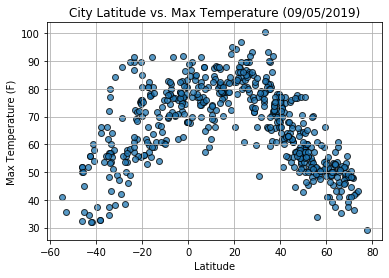

In [79]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('latitude_vs_temp.png')
plt.show()

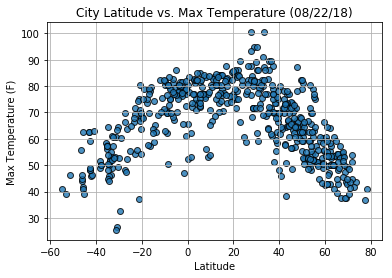

In [6]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

#### Latitude vs. Humidity Plot

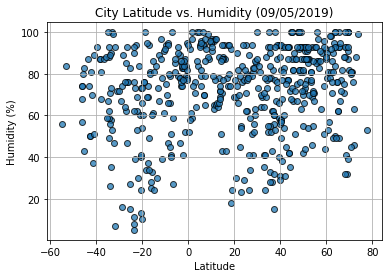

In [80]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('lat_vs_humidity.png')
plt.show()

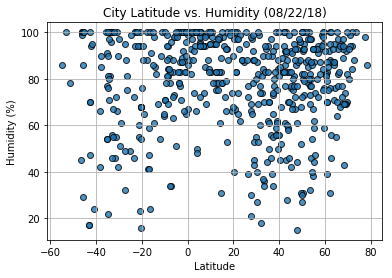

In [7]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

#### Latitude vs. Cloudiness Plot

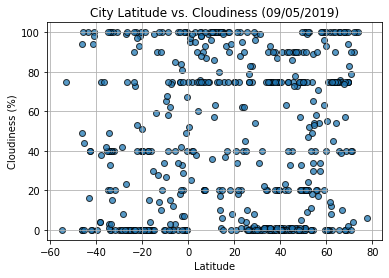

In [81]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('lat_vs_cloudiness.png')
plt.show()

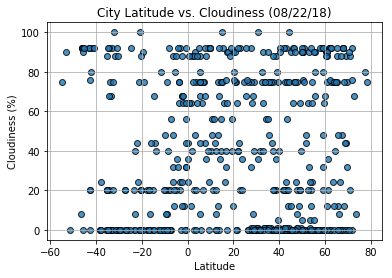

In [8]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

#### Latitude vs. Wind Speed Plot

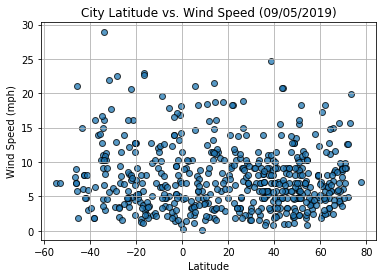

In [82]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('lat_vs_windspeed.png')
plt.show()

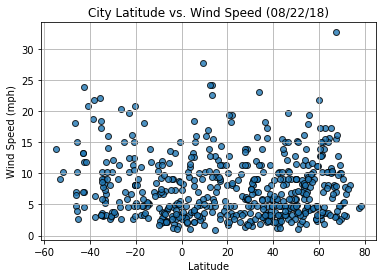

In [9]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.